# Solution to the first Lab assigment
## Mansoor Nabawi

Part A: reading the text and finding:

the number of unique words.

the top 5 most frequent words.

*importing necessary libraries*

In [1]:
import operator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

reading text file

In [2]:
random_text = open("random_text.txt","r")
text = random_text.read()
random_text.close()
print(text)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec in erat maximus, eleifend ante eget, feugiat libero. Maecenas vel pharetra orci. Morbi vitae finibus augue. Nunc pharetra ac lacus vel efficitur. Cras sed urna non ex luctus imperdiet. Sed eu volutpat nunc. Maecenas et nunc tellus. Nunc eget purus consectetur, ultricies leo iaculis, gravida elit. Nunc molestie tortor dolor, nec laoreet lectus sollicitudin sed. Duis ultricies at diam nec tincidunt. Donec at metus placerat lacus commodo molestie nec ut risus. Curabitur fermentum justo lectus, non maximus mauris placerat vel. Fusce auctor ex massa, nec condimentum enim interdum nec. Maecenas consectetur varius nunc, auctor pellentesque mi feugiat eu. Cras lacinia, ipsum vitae malesuada eleifend, mi magna hendrerit enim, id fringilla urna ante in magna.

Suspendisse dolor nisl, interdum sit amet rutrum eget, congue sit amet odio. Vestibulum vestibulum orci sed volutpat facilisis. Quisque consectetur convallis mauris. In pretium

cleaning the text in order to continue

In [3]:
text = text.lower().replace(","," ").replace(".", " ")

In [4]:
text

'lorem ipsum dolor sit amet  consectetur adipiscing elit  donec in erat maximus  eleifend ante eget  feugiat libero  maecenas vel pharetra orci  morbi vitae finibus augue  nunc pharetra ac lacus vel efficitur  cras sed urna non ex luctus imperdiet  sed eu volutpat nunc  maecenas et nunc tellus  nunc eget purus consectetur  ultricies leo iaculis  gravida elit  nunc molestie tortor dolor  nec laoreet lectus sollicitudin sed  duis ultricies at diam nec tincidunt  donec at metus placerat lacus commodo molestie nec ut risus  curabitur fermentum justo lectus  non maximus mauris placerat vel  fusce auctor ex massa  nec condimentum enim interdum nec  maecenas consectetur varius nunc  auctor pellentesque mi feugiat eu  cras lacinia  ipsum vitae malesuada eleifend  mi magna hendrerit enim  id fringilla urna ante in magna \n\nsuspendisse dolor nisl  interdum sit amet rutrum eget  congue sit amet odio  vestibulum vestibulum orci sed volutpat facilisis  quisque consectetur convallis mauris  in pret

In [5]:
lt = str.split(text)

**number of unique words**

In [6]:
uniqe_words = set(lt)
len(uniqe_words)

151

**top 5 most occured words**

In [7]:
wordcount={}
for word in lt:
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1

In [8]:
sorted_dic = dict(sorted(wordcount.items(), key = operator.itemgetter(1), reverse=True))
    
print('{:15}{:3}'.format('Word','Count'))
print('-' * 18)

# printing the words and its occurrence in order.
for word,occurance in (sorted_dic.items()): 
  print('{:15}{:3}'.format(word,occurance))

Word           Count
------------------
in              12
sed             12
ante             9
eu               9
at               9
sit              8
amet             8
elit             8
non              8
donec            7
eget             6
vel              6
nunc             6
nec              6
lectus           6
ut               6
mauris           6
vitae            5
finibus          5
enim             5
id               5
convallis        5
euismod          5
dolor            4
consectetur      4
feugiat          4
augue            4
urna             4
ex               4
tellus           4
iaculis          4
molestie         4
duis             4
diam             4
tincidunt        4
metus            4
commodo          4
risus            4
fusce            4
condimentum      4
interdum         4
nisl             4
rutrum           4
vestibulum       4
ornare           4
nullam           4
tempor           4
sagittis         4
lorem            3
maximus          3
libero    

*top 5 most occured*

In [9]:
list(sorted_dic.items())[:5]

[('in', 12), ('sed', 12), ('ante', 9), ('eu', 9), ('at', 9)]

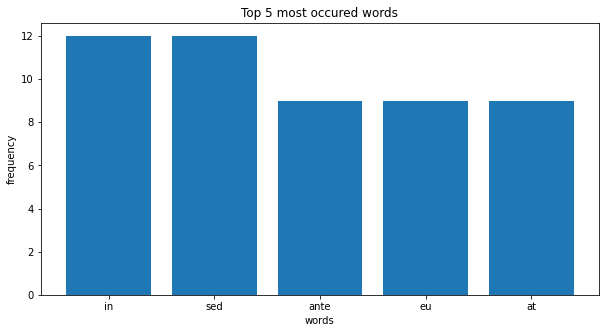

In [10]:
labels, values = zip(*sorted_dic.items())
labels = labels[:5]
values = values[:5]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("Top 5 most occured words")
plt.ylabel("frequency")
plt.xlabel("words")
plt.show()

## Part B

to install matplotlib perform this command

pip install matplotlib

libraries imported at the beginning of the notebook

*1.reading and displaying image*

In [11]:
img = mpimg.imread('lena_gray.jpg')
print(img)

[[144 143 143 ... 153 135 110]
 [145 144 144 ... 146 128 104]
 [145 145 144 ... 149 132 109]
 ...
 [ 38  40  43 ...  85  84  84]
 [ 39  41  44 ...  87  87  88]
 [ 40  42  45 ...  86  87  89]]


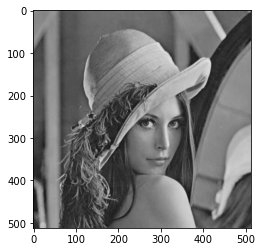

In [12]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

*2. average filer*

In [13]:
fltr = np.array([[1,1,1],
                [1,1,1],
                [1,1,1]])
fltr = np.multiply(1/9, fltr)
print(fltr)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [14]:
img.shape

(512, 512)

padding

In [18]:
padded_img = np.pad(img,(1,1), constant_values=1)
padded_img.shape

(514, 514)

In [ ]:
def filtering(x, fl):
    summed = 0
    for j in range(fl.shape[0]):
        for jj in range(fl.shape[1]):
            summed += x[j,jj]*fl[j,jj]
    return summed

*3.4.padding*

In [15]:
def blurr_image(img):
    h = img.shape[0]
    w = img.shape[1]
    
    new_img = np.empty(img.shape)
    pad_img = np.pad(img, (1), "constant", constant_values = (1))
    for col in range(h):
        for row in range(w):
            summed = 0
            point = img[col:col+3, row:row+3]
            for x,y in zip(fltr, point):
                for i,j in zip(x, y):
                    summed += i*j
            new_img[col, row] = summed
    return new_img

**plotting the original image and its blurred form**

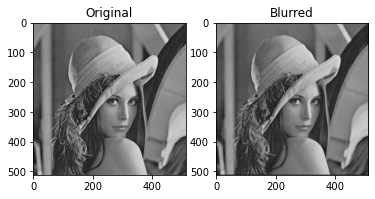

In [16]:
blurred_img = blurr_image(img)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.title("Blurred")
plt.imshow(blurred_img,cmap='gray', vmin=0, vmax=255)

as we see the blurring applied to the image is not that much visible, so we can do the blurring for many times to see the effect

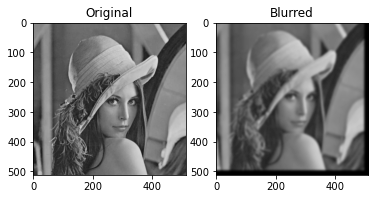

In [17]:
for i in range(15):
    blurred_img = blurr_image(blurred_img)
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img,cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.title("Blurred")
plt.imshow(blurred_img,cmap='gray', vmin=0, vmax=255)